In [1]:
import matplotlib.pyplot as plt
import numpy as np 

### Decision Making and Expectations

- expectation of something is about identifying average quantifiable scenario for a given event that accounts for randomness 
    - aka taking the average, also given the probability of each outcome
    - note that it is expected that the outcomes of random variables you find the expectation for are numerical values and not something like "rainy" (cuz how do you sum that??)

- expected value of random variable: taking sum of outcomes of probability table, where we multiply each by the weights 
- formally: $E[X] \triangleq \sum_{x \epsilon X} x*p_x(x) $

- Other ways to compute expectation
1. Conditional Expectation
 - if we have X and Y where we know $P_{X|Y}(.|y)$ where y is a fixed value and X is real-valued
 - can compute by: multiplying all x values by $p_{X|Y}(x|y)$ and summing them 
 - denotation: $E[X|Y=y] = \sum_{x \epsilon X} x*P_{X|Y}(x|y)$

 2. Expectation of the Function of a Random Variable 
 - given Z = f(X), we can say $p_z$ is the probability table for f(X)
    - can compute $p_Z(z)$ by looking at every label in table p_X that gets mapped to z: $ {x \epsilon X : f(x) = z}$
    - then sum those up 

    - indicator function: takes as input a statement S and outputs 
    ex: $ 1{S} = {1 if S happens, 0 otherwise} $
    using this, we can find probability of Z = z 

     $ p_Z(z) = \sum_{x \epsilon X such that f(x)=z} p_X(x)$ OR $ \sum_{x \epsilon X} 1{f(x)=z}p_X(x) $

    - expectation: $E[f(X)] = \sum_x f(x) p_X(x)$
    - for multiple random variables: $\sum_{x \epsilon X, y \epsilon Y} f(x,y)p_{X|Y}(x,y)$
    - $E[X+Y] = \sum_{x \epsilon X, y \epsilon Y} (x+y)p_{X|Y}(x,y)$

 QUESTION: go over functions of random variables?

 ### Variance / Standard Deviation

- variance def: measure of how much a random variable deviates from its expectation (or uncertainty)
    - high variance = high uncertainty 
 variance of random variable: $var(X) \triangleq E[(X-E[X])^2] = E[X^2] - (E[X])^2$
 - computing it requires combo of expectation and functions, since E(x-e(x)^2) is a function 
 - units = og units ^2
 - can never be negative since real nums are nonneg, and ur taking the avg of the squared quantities

 QUESTION: by the def of std given, does that mean std is like uncertainty but in terms of the original units 

std of random variable: $std(X) \triangleq \sqrt{var(X)}$

#### Combining Conditional/Function Expectation

- given we know $P_{X|Y}(.|y)$ for X and Y and a function f, $$E[f(X)|Y = y] = \sum_x f(x) p_{X|Y}(x|y)$$

- can be used to form cost functions, where we figure out the "weight" or "cost" of a decision based on outcome given another outcome 
- ex: in the medical diagnosis (pos/neg), the cost of treating someone who is pos but healthy vs someone who is pos but infected 


indicator random variable: "indicates" if an event happens 
denoted as 1(.), 1(S) = {1 if S happens, 0 otherwise}

- linearity of expectation: equality that $E[X+Y] = E[X] + E[Y]$
    - holds regardless if X and Y independent 

QUETSION: derivation of var(X+Y) = var(X) + var(Y)



### Law of Total Expectation 

- uses the same principle as law of total probability, but with expectation 

$$ E[X] = \sum_{i=1}^n E[X | B_i] P(B_i)$$
where 
$$E[X|B_i] = \sum_{x \epsilon X}xp_{X|B_i}(x) = \sum_{x \epsilon X} x \frac{P(X=x,B_i)}{P(B_i)}$$

### Information-Theoretic Measures of Randomness 

- can use information theory to measure uncertainty or randomness 

### Shannon Information Content 
- aka self-information
- number of bits necessary to store an event A, given that we don't know which outcome it will be (each outcome may take a diff amt of bits )
    - could also be thought of as how surprised we would be to observe an event 
    - could be a fractional value of bits, since its essentially an avg given the probability of multiple outcomes possibly occurring 
- denoted by: $log_2{1/P(A)}$

- ex: given $x \epsilon {0,1,...63}$, SIC of observing x is $log_2\frac{1}{P(integer is x)} = log_2 \frac{1}{1/64} = log_2 64 = 6$ bits

- if the outcome was always 1 value (lets say outcome was always 0) then the probability is always 1 and so: $$log_@ \frac{1}{int = 0} = log_2 1/1 = o bits $$
because the info is not new

- however for same situation, observing 1-63 would be inf bits bc $log_2 1/0$ where 0 is the probability of observing 1-63, since its impossible 

- sum of all shannon info contents of an event (yes we saw it this time, no we didnt see it this round) is telescoping; it tells us that before we know the actual value, we need this certain amount of bits and the more guesses we have gives us only a miniscule amount more of bits of info that make it sum up to around the same bits of info still 


### Shannon Entropy 

- the number of bits contained in a random variable, as opposed to an event (one level lower) 
    - found by taking expectation of shannon info content across ALL possible outcomes of the variable AKA entropy of random variable 

$$ H(X) = \sum_x p_X(x)*log_2 \frac{1}{p_X(x)}$$ 
- H(X) is the average number of bits needed to encode each sample of a random variable X 
- note that the above equation is in the form of an expectation, so we can represent H(X) by 
$$ H(X) = E[log_2 \frac{1}{p_X(X)}]$$

- note that entropy of a random variable doesn't change if you switch the labels of the probabilities (switching biased coin from 3/4 heads to 3/4 tails favor still yields same overall entropy)

/tmp/ipykernel_98985/30325630.py:2: RuntimeWarning: divide by zero encountered in divide
  entropy = lambda p: np.sum(p * np.log2(1/p)) # where p is a 1d array of probabilities
/tmp/ipykernel_98985/30325630.py:2: RuntimeWarning: invalid value encountered in multiply
  entropy = lambda p: np.sum(p * np.log2(1/p)) # where p is a 1d array of probabilities


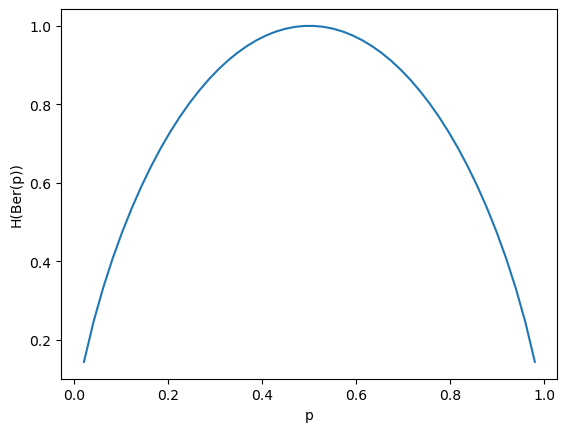

In [2]:
# Code to compute entropy 
entropy = lambda p: np.sum(p * np.log2(1/p)) # where p is a 1d array of probabilities 

# this commented out function is equivalent to the line above 
# # def entropy(p):
# #     return np.sum(p * np.log2(1 / p))

# computing examples from exercise 
entropy_L1 = entropy(np.array([999999/1000000, 1/1000000]))
entropy_L2 = entropy(np.array([999999/1000000, 1/1000000]))
entropy_L3 = entropy(np.array([9/10, 1/10]))

# exercise: plotting entropy to find maximized entropy given p 
p_list = np.linspace(0, 1, 50)
p_list = np.linspace(0, 1, 50)
plt.figure()
plt.plot(p_list,
         [entropy(np.array([p, 1-p])) for p in p_list])
plt.xlabel('p')
plt.ylabel('H(Ber(p))')
plt.show()

# note when printed, that the max happesn when p = 1/2, corresponding to a uniform distribution on the two possible values 

### Information Divergence

- Kullback-Leibler divergence/ K divergence/ relative entropy 
- measures how different two distributions p and q are (over same alphabet)
    - (alphabet refers to set of values ex: tails or heads would be an alphabet)
- also what is a sample of p or sample of the random variable mean exactly?

- new notation
$$ \sum_x p(x) log_2 1/p(x) \triangleq E_{X~p} [log_2 1/p(X)]$$
- E_X~p means we are taking expectation with respect to random var X drawn from distribution p 
alternative ex: finding info content according to distrib q BUT still sampling from p (encoding samples as if it were from q distrib)
$$ \sum_x p(x) log_2 1/q(x) \triangleq E_{X~p} [log_2 1/q(X)]$$

information divergence is what you pay in bits for trying to encode a sample from p using info content acc to q instead of p 
- is always $\geq 0$ 
- if equal to 0, p and q are same distribution (p(x) = q(x) for all x) aka $\textbf{Gibb's inequality}$
$$D(p||q) = E_{X~p}[log_2 1/q(X)] - E_{X~p}[log_2 1/p(X)]$$
- is not symmetric; D(p||q) != D(q||p)
- another valid equation for info divergence: 
$$ D(p||q) = \sum_x p(x) log \frac{p(x)}{q(x)}$$

QUESTION going over the D(px || pu) exercise why does kpx(x) become log2 k + \sum etc ?

### Mutual Information 

- given two discrete random variables X and Y, mutual info denoted by I(X;Y)
- measures how much information they share 
    - how far X and Y are from being independent (I(X;Y) = 0 if they are actually indep)
$$I(X;Y) \triangleq D(p_{X,Y} || p_Xp_Y)$$

- pxpy is distribution if X and Y were actually independent 

- if X = Y, they would share the most possible amt of information 



In [ ]:
# mutual information code 
joint_prob_XY = np.array([[0.10, 0.09, 0.11], [0.08, 0.07, 0.07], [0.18, 0.13, 0.17]])

#marginal distributions px and py 
prob_X = joint_prob_XY.sum(axis=1)
prob_Y = joint_prob_XY.sum(axis=0)

# joint prob if X and Y were indep
joint_prob_XY_indep = np.outer(prob_X, prob_Y)

# finding info divergnece of 
info_divergence = lambda p, q: np.sum(p * np.log2(p / q))

# the following is the same as above line 
# # def info_divergence(p, q):
# #     return np.sum(p * np.log2(p / q))

# computes I(X;Y)
mutual_info_XY = info_divergence(joint_prob_XY, joint_prob_XY_indep)

### Infinite Outcomes 

- how to represent outcomes with an experiment where there may be an arbitrary amt of rounds (ex: flipping coin till we see heads, could go on forever?)
- geometric distribution: example of distribut w infinite alphabet 
    - prob distrib that models # of trials required to achieve first success (ex: flip coin until your first heads, could go on forever hypothetically?)
    - called geometric bc of geometric decay as x is increased 
    - assumptions: 
    1. trials are independent 
    2. only two outcomes (so is bernoulli)
    3. success probability is same each trial 
- can have indefinite num of trials 
- can represent the desired question as a random variable (ex: X = # tosses until heads shows)

- X ~ Geo(p) where x increases 

$p_x(x) = (1-p)^{x-1}p $ for x = 1,2,...

QUESTION confusion on geometric distribution 


### Expectation of Geometric Distribution
- since partition of sample space is undefined/inf 
$$E[X] = \sum_{i=1}^n E[X |B_i] P(B_i)$$
and 
$$E[X|B_i] = \sum_{x \epsilon X} xp_{X|B_i}(x) = \sum_{x \epsilon X} x \frac{P(X = x,B_i)}{P(B_i)}$$



### Discrete Probability Spaces and Random Variables 

- sample space for geometric distributions can be considered "countably infinite" 
    - inf number of entries 

- discrete probability space: $(\Omega, P)$ like finite probability space but sample space $\Omega$ is allowed to be finite or countably inf 
    - consists of finit/countably inf sample space 
    - assignment of probability P where for any outcome $\omega \epsilon \Omega$ there is a $P(\omega)$ with value at least 0 or at most 1 

- discrete random variables: Given discrete probability space, is a rand var X that maps Omega to a set of values X